In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df = pd.read_csv('Dataset.csv', encoding  = 'unicode_escape', header = 0)

In [8]:
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,M,F,"40,000",1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,M,M,"30,000",3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,M,M,"80,000",5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,S,M,"70,000",0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,S,M,"30,000",0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


In [9]:
df.count()

ID                  1026
Marital Status      1026
Gender              1026
Income              1026
Children            1026
Education           1026
Occupation          1026
Home Owner          1026
Cars                1026
Commute Distance    1026
Region              1026
Age                 1026
Purchased Bike      1026
dtype: int64

In [10]:
#identify types of columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026 entries, 0 to 1025
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                1026 non-null   int64 
 1   Marital Status    1026 non-null   object
 2   Gender            1026 non-null   object
 3   Income            1026 non-null   object
 4   Children          1026 non-null   int64 
 5   Education         1026 non-null   object
 6   Occupation        1026 non-null   object
 7   Home Owner        1026 non-null   object
 8   Cars              1026 non-null   int64 
 9   Commute Distance  1026 non-null   object
 10  Region            1026 non-null   object
 11  Age               1026 non-null   int64 
 12  Purchased Bike    1026 non-null   object
dtypes: int64(4), object(9)
memory usage: 104.3+ KB


In [11]:
df.describe()

,ID,Children,Cars,Age
count,1026.000000,1026.000000,1026.000000,1026.000000
mean,19969.196881,1.892788,1.437622,44.138402
std,5332.672942,1.626670,1.125538,11.349282
min,11000.000000,0.000000,0.000000,25.000000
25%,15304.750000,0.000000,1.000000,35.000000
50%,19744.000000,2.000000,1.000000,43.000000
75%,24457.750000,3.000000,2.000000,52.000000
max,29447.000000,5.000000,4.000000,89.000000


In [12]:
# identify null and missing values
df.isnull().sum()

ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64

In [13]:
# count the number of duplicates value
df.duplicated().sum()

26

In [14]:
# drop the duplicates value
df.drop_duplicates(inplace = True)

In [15]:
df.duplicated().sum()

0

In [16]:
# change the datatypes of column 'income' from object to float
df['Income'] = df['Income'].str.replace(',', '')
df['Income'] = df['Income'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    1000 non-null   object 
 2   Gender            1000 non-null   object 
 3   Income            1000 non-null   float64
 4   Children          1000 non-null   int64  
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        1000 non-null   object 
 8   Cars              1000 non-null   int64  
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               1000 non-null   int64  
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 109.4+ KB


In [17]:
# im creating age brackets columns using numpy
def determine_age_bracket(Age):
    if Age > 55:
        return 'Old'
    elif Age >=31:
        return 'Middle Age'
    elif Age < 31:
        return 'Adolescents'
    else:
        return 'Invalid'


df['Age_Bracket'] = df['Age'].apply(determine_age_bracket)

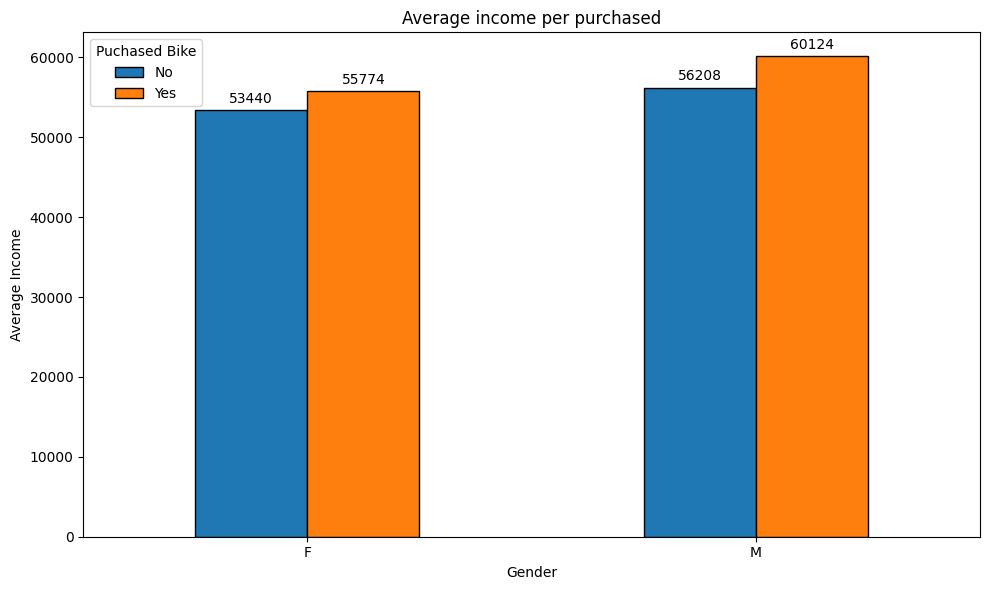

In [18]:
# i visualize the Average income per bike purchased
x = df.groupby(['Gender', 'Purchased Bike'])['Income'].mean().reset_index()

pivot_df = x.pivot(index = 'Gender', columns = 'Purchased Bike', values = 'Income')
fig, ax = plt.subplots(figsize = (10,6))

bars = pivot_df.plot(kind = 'bar', ax = ax, edgecolor = 'black' )

for container in bars.containers:
    for rect in container:
        height = rect.get_height()
        ax.annotate(f'{height:.0f}', #format height value to 2 decimal places
                   xy = (rect.get_x() + rect.get_width() / 2, height), # Position
                   xytext= (0,3), # offset text slightly above the bar
                   textcoords = 'offset points',
                    ha = 'center', va = 'bottom')
                    
    

ax.set_xlabel('Gender')
ax.set_ylabel('Average Income')
ax.set_title('Average income per purchased')
ax.legend (title = 'Puchased Bike')
plt.xticks(rotation = 0 )
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

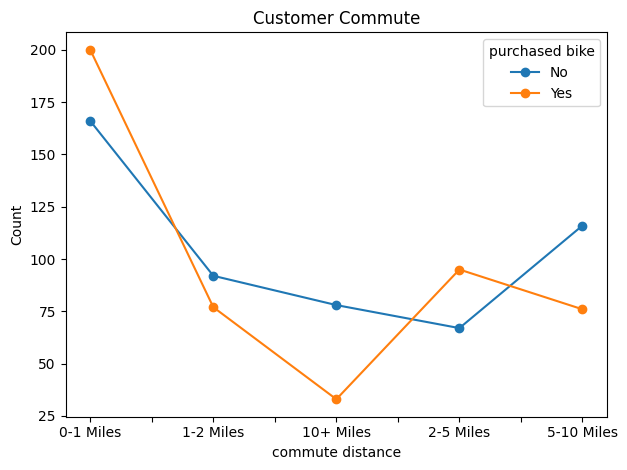

In [19]:
# commute distance and the numbers of bike who purchased

x = df.groupby(['Commute Distance', 'Purchased Bike'])['Purchased Bike'].count().unstack()

plt.figure(figsize = (10,6))
x.plot(kind = 'line', marker = 'o')
plt.title('Customer Commute')
plt.xlabel('commute distance')
plt.ylabel('Count')
plt.grid(False)
plt.legend(title = 'purchased bike')
plt.tight_layout()
plt.show()


In [20]:
df['Age_Bracket'].value_counts()

Age_Bracket
Middle Age     719
Old            171
Adolescents    110
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

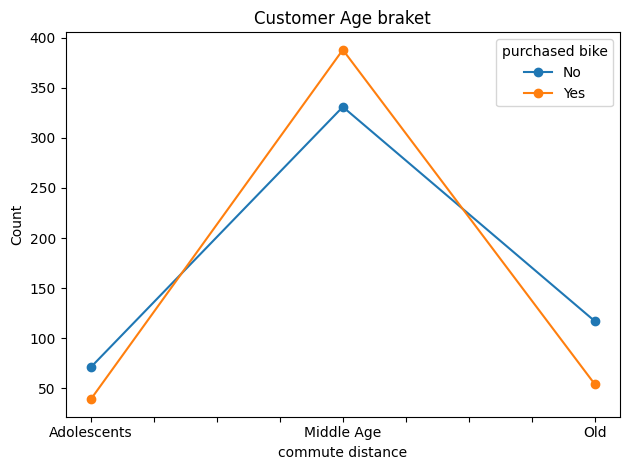

In [23]:
# this graph represent the number of bike purchased based on Customer Age Bracket
x= df.groupby(['Age_Bracket', 'Purchased Bike'])['Purchased Bike'].count().unstack()
plt.figure(figsize = (10,6))
x.plot(kind = 'line', marker = 'o')
plt.title('Customer Age braket')
plt.xlabel('commute distance')
plt.ylabel('Count')
plt.grid(False)
plt.legend(title = 'purchased bike')
plt.tight_layout()
plt.show()